In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.rcsetup as rcsetup
import seaborn as sns
htrain = pd.read_csv("../Machine-Learning-Project/train.csv")
htest = pd.read_csv("../Machine-Learning-Project/test.csv")

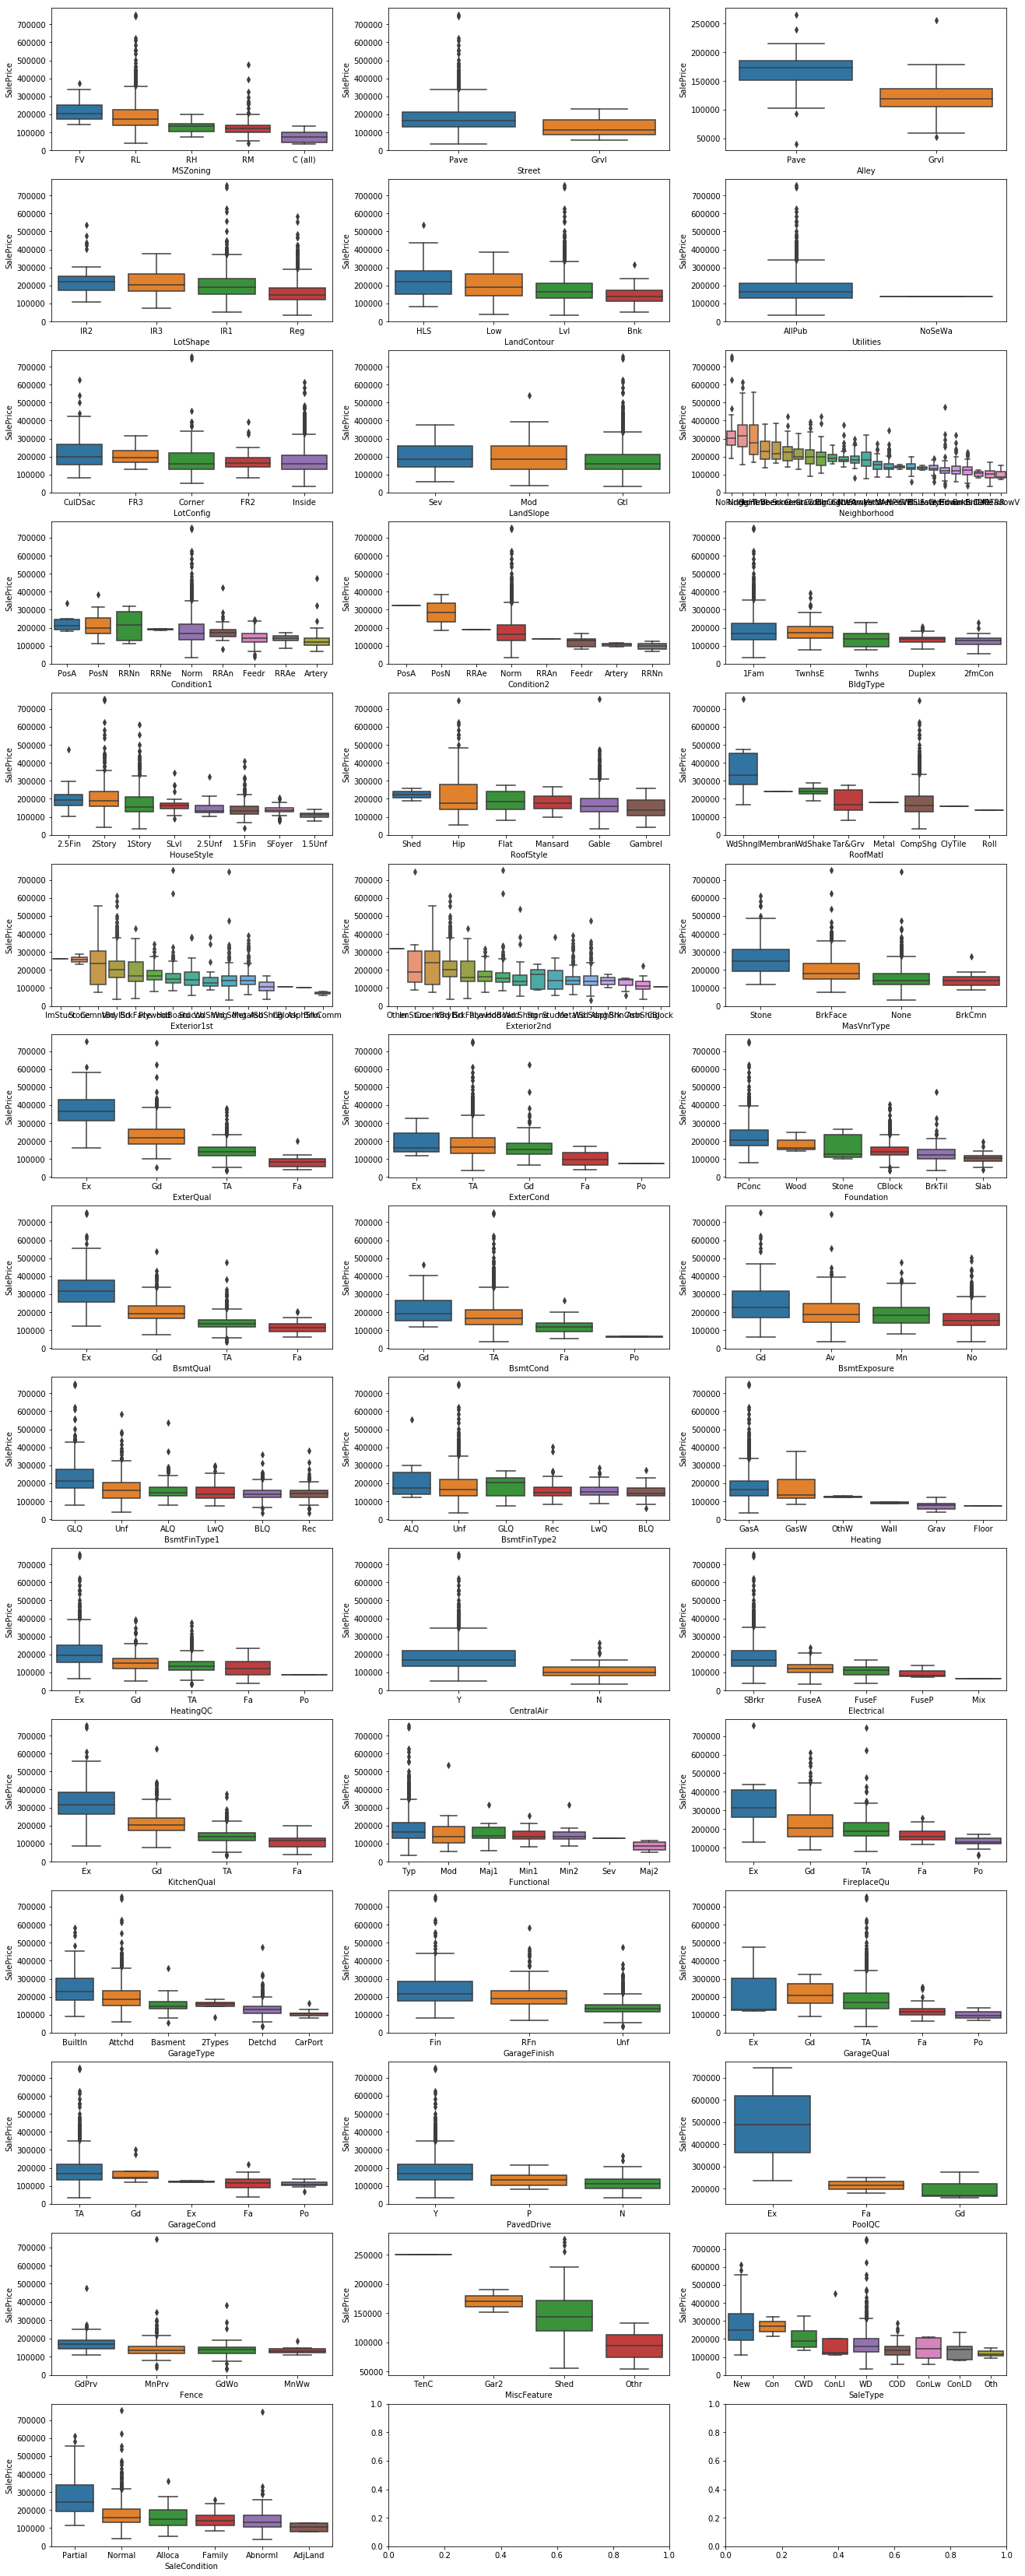

In [2]:
obj_cols = htrain.select_dtypes(include = "object")

fig, axes = plt.subplots(ncols=3, nrows= 15,figsize=(22,60))

for i, c in enumerate(obj_cols):
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    order = htrain.groupby(c)['SalePrice'].mean().fillna(0).sort_values()[::-1].index
    sns.boxplot(x=htrain[c], y=htrain['SalePrice'], ax = ax_curr, order=order)
plt.show()

In [3]:
ntrain = htrain.shape[0]
ntest = htest.shape[0]
y_train = htrain.SalePrice.values
all_data = pd.concat((htrain, htest)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))
all_data.head()

all_data size is : (2919, 80)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [4]:
#looking at missing values in data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0]

,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageQual,159
GarageFinish,159
GarageYrBlt,159
GarageCond,159


In [5]:
#fill categorical variables that have Na as category
col_missings = ["Alley", "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1", 
"BsmtFinType2", "FireplaceQu", "GarageType","GarageFinish","GarageQual",
"GarageCond", "PoolQC", "Fence","MiscFeature"]
all_data[col_missings] = all_data[col_missings].fillna(value = "None")

In [6]:
#get total square footage of house
all_data = all_data.assign(totalsq = all_data.TotalBsmtSF + all_data.GrLivArea)


In [7]:
#check missing
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0]

,0
LotFrontage,486
GarageYrBlt,159
MasVnrType,24
MasVnrArea,23
MSZoning,4
Utilities,2
Functional,2
BsmtHalfBath,2
BsmtFullBath,2
KitchenQual,1


In [8]:
from pandas.api.types import CategoricalDtype

#convert categorical ordinal columns
col_ordinal = all_data[['ExterQual', 'ExterCond', 'BsmtQual',"BsmtCond",
           "BsmtExposure", "HeatingQC",
          "KitchenQual", "FireplaceQu", "GarageType","GarageQual",
          "GarageCond","PoolQC"]]

ord_dic1 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1,'None':0}
for col in col_ordinal:
    all_data[col] = all_data[col].map(lambda x: ord_dic1.get(x, 0))



In [9]:
#fix LotShape
ord_dic2 = {'Reg': 4, 'IR1': 3, 'IR2':2, 'IR3':1}
all_data.LotShape = all_data.LotShape.map(lambda x: ord_dic2.get(x, 0))


In [10]:
#fix BsmntExposure
ord_dic3 = {"Gd":4 ,'Av':3, 'Mn':2, 'No':1, 'None':0}
all_data.BsmtExposure = all_data.BsmtExposure.map(lambda x: ord_dic3.get(x, 0))


In [11]:
#fix GarageFinish
ord_dic4 = {'Fin':3,'RFn':2,'Unf':1,'None':0}
all_data.GarageFinish = all_data.GarageFinish.map(lambda x: ord_dic4.get(x, 0))


In [12]:
#fix Paved
ord_dic5 ={'Y':3,'P':2,"N":1}
all_data.PavedDrive = all_data.PavedDrive.map(lambda x: ord_dic5.get(x, 0))


In [13]:
#fix Electrical
ord_dic6={'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1}
all_data.Electrical = all_data.Electrical.map(lambda x: ord_dic6.get(x, 0))

In [14]:
#fix BsmntFinType1
ord_dic7 = {"GLQ": 6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "None":0}
all_data.BsmtFinType1 = all_data.BsmtFinType1.map(lambda x: ord_dic7.get(x, 0))

In [15]:
#fix Fence
ord_dic8={'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0}
all_data.Fence = all_data.Fence.map(lambda x: ord_dic8.get(x, 0))

In [16]:
#fix Functional
ord_dic9={"Typ":8 ,"Min1":7 , "Min2": 6, "Mod": 5, "Maj1":4 , "Maj2": 3, "Sev": 2, "Sal":1 }
all_data.Functional = all_data.Functional.map(lambda x: ord_dic9.get(x, 0))

In [17]:
#near zero
all_data = all_data.drop(["Street","3SsnPorch","Id", "Utilities","Condition2", "RoofMatl", "PoolQC","LowQualFinSF", "PoolArea", "MiscVal"],axis=1)

In [18]:
all_data.shape

(2919, 71)

In [19]:
all_dummy = pd.get_dummies(all_data, drop_first = True)
dum2 = all_dummy.copy()

In [20]:
from fancyimpute  import KNN
all_dummy[['LotFrontage','MasVnrArea']] = pd.DataFrame(KNN(k=54).complete(all_dummy[['LotFrontage','MasVnrArea']])).as_matrix()

Using TensorFlow backend.


Imputing row 1/2919 with 0 missing, elapsed time: 1.963
Imputing row 101/2919 with 1 missing, elapsed time: 1.965
Imputing row 201/2919 with 0 missing, elapsed time: 1.967
Imputing row 301/2919 with 0 missing, elapsed time: 1.969
Imputing row 401/2919 with 0 missing, elapsed time: 1.971
Imputing row 501/2919 with 0 missing, elapsed time: 1.973
Imputing row 601/2919 with 0 missing, elapsed time: 1.975
Imputing row 701/2919 with 0 missing, elapsed time: 1.977
Imputing row 801/2919 with 0 missing, elapsed time: 1.979
Imputing row 901/2919 with 1 missing, elapsed time: 1.981
Imputing row 1001/2919 with 0 missing, elapsed time: 1.983
Imputing row 1101/2919 with 0 missing, elapsed time: 1.985
Imputing row 1201/2919 with 0 missing, elapsed time: 1.987
Imputing row 1301/2919 with 1 missing, elapsed time: 1.989
Imputing row 1401/2919 with 0 missing, elapsed time: 1.992
Imputing row 1501/2919 with 1 missing, elapsed time: 1.993
Imputing row 1601/2919 with 0 missing, elapsed time: 1.994
Imputing 

In [21]:
dum2[['LotFrontage']] = pd.DataFrame(KNN(k=54).complete(dum2[['LotFrontage']])).as_matrix()

Imputing row 1/2919 with 0 missing, elapsed time: 1.387
Imputing row 101/2919 with 1 missing, elapsed time: 1.388
Imputing row 201/2919 with 0 missing, elapsed time: 1.389
Imputing row 301/2919 with 0 missing, elapsed time: 1.390
Imputing row 401/2919 with 0 missing, elapsed time: 1.391
Imputing row 501/2919 with 0 missing, elapsed time: 1.391
Imputing row 601/2919 with 0 missing, elapsed time: 1.392
Imputing row 701/2919 with 0 missing, elapsed time: 1.393
Imputing row 801/2919 with 0 missing, elapsed time: 1.393
Imputing row 901/2919 with 1 missing, elapsed time: 1.394
Imputing row 1001/2919 with 0 missing, elapsed time: 1.394
Imputing row 1101/2919 with 0 missing, elapsed time: 1.394
Imputing row 1201/2919 with 0 missing, elapsed time: 1.395
Imputing row 1301/2919 with 1 missing, elapsed time: 1.396
Imputing row 1401/2919 with 0 missing, elapsed time: 1.397
Imputing row 1501/2919 with 1 missing, elapsed time: 1.397
Imputing row 1601/2919 with 0 missing, elapsed time: 1.398
Imputing 

In [22]:
#fill in missing value for GarageYr
all_dummy['GarageYrBlt'] = all_dummy['GarageYrBlt'].fillna(0)
all_dummy.loc[all_dummy['GarageYrBlt']>0, 'GarageYrBlt']=all_dummy['GarageYrBlt']-all_dummy['YearBuilt']
all_dummy.shape

(2919, 180)

In [23]:
missing = pd.DataFrame(all_dummy.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0].index

Index(['BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'totalsq', 'TotalBsmtSF',
       'BsmtFinSF1', 'BsmtFinSF2', 'GarageArea', 'GarageCars'],
      dtype='object')

In [24]:
all_dummy.dropna(axis = 0)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFullBath,BsmtHalfBath,...,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,856,854,3,3,0,706.0,0.0,6,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,1262,0,3,3,0,978.0,0.0,5,0.0,1.0,...,1,0,0,0,0,0,0,0,0,1
2,920,866,3,3,0,486.0,0.0,6,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,961,756,3,4,0,216.0,0.0,5,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,1145,1053,4,3,0,655.0,0.0,6,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
5,796,566,1,3,0,732.0,0.0,6,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
6,1694,0,3,3,0,1369.0,0.0,6,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
7,1107,983,3,3,0,859.0,32.0,5,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
8,1022,752,2,3,0,0.0,0.0,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
9,1077,0,2,3,0,851.0,0.0,6,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [25]:
#ntrain = htrain.shape[0]
#ntest = htest.shape[0]
#y_train = htrain.SalePrice.values
new_train = all_dummy[:ntrain]
new_test = all_dummy[:ntest]
y_train =pd.DataFrame(y_train)
y_train.columns = ["SalePrice"]

new_train = new_train.merge(y_train, how = "inner", right_index = True, left_index = True)


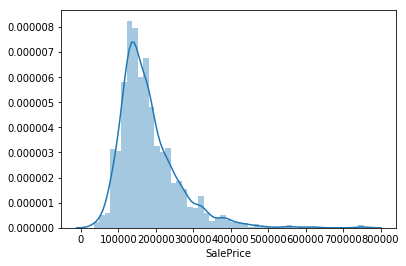

In [26]:
sns.distplot(new_train['SalePrice']);
#histogram of sale prices shows that we need to normalize SalePricd

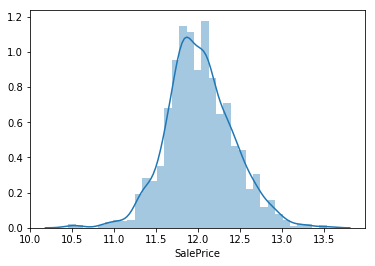

In [27]:
new_train.SalePrice = np.log(new_train.SalePrice)
sns.distplot(new_train['SalePrice'])


(1460, 181)

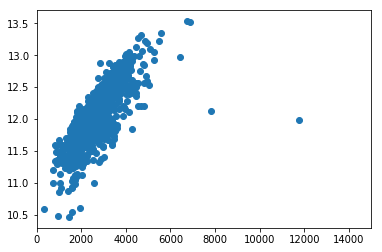

In [28]:
#look at TotalSquareFt against Price
fig = plt.figure()
sub1 = fig.add_subplot(111)
sub1.scatter(x = new_train.totalsq, y = new_train.SalePrice)
sub1.set_xlim(0, 15000)
new_train.shape

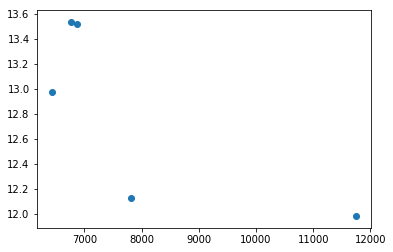

5


In [31]:
from scipy import stats
#examinig outliers by computing abs value of zscore and more than 4 sd from mean w/ TotalSq
z_score = np.abs(stats.zscore(new_train[["totalsq", "SalePrice"]]))
outliers = total_price[z_score >  4]
outliers = outliers.drop_duplicates()
plt.scatter(x=outliers.totalsq, y = outliers.SalePrice)
plt.show()
print(len(outliers))
#there are outliers and they are from homes above 4000 sq ft and below 2000 sqft.?

In [32]:
#dataset with the outliers removed
out_train = new_train[(z_score < 4).all(axis=1)]
out_train = out_train.drop_duplicates()
out_train.shape

(1455, 181)